In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from matplotlib import image, pyplot

import matplotlib.pyplot as plt

#Imports for the data loading
from PIL import Image
#from fastai.vision.all import *
from pathlib import Path
import numpy as np
feature_vector_length = 128*128
num_classes = 1

In [ ]:
!apt install unzip
!unzip "../home/data.zip" -d "../home/test"

In [ ]:
import os
# Load the data -----------------------------------------
path_train_normal = '../home/test/chest_xray_128/train_normal/'
path_train_pneumonia = '../home/test/chest_xray_128/train_pneumonia/'
path_test_normal = '../home/test/chest_xray_128/test_normal/'
path_test_pneumonia = '../home/test/chest_xray_128/test_pneumonia/'

In [ ]:
# import os
# Load the data -----------------------------------------
# path_train_normal = '../gdrive/MyDrive/Colab Notebooks/chest_xray_128/train_normal/'
# path_train_pneumonia = '../gdrive/MyDrive/Colab Notebooks/chest_xray_128/train_pneumonia/'
# path_test_normal = '../gdrive/MyDrive/Colab Notebooks/chest_xray_128/test_normal/'
# path_test_pneumonia = '../gdrive/MyDrive/Colab Notebooks/chest_xray_128/test_pneumonia/'

train_normal_images = os.listdir(path_train_normal)
test_normal_images = os.listdir(path_test_normal)
train_pneumonia_images = os.listdir(path_train_pneumonia)
test_pneumonia_images = os.listdir(path_test_pneumonia)

print("train normal: ", len(train_normal_images), " images")
print("test normal: ", len(test_normal_images), " images")
print("train pneumonia: ", len(train_pneumonia_images), " images")
print("test pneumonia: ", len(test_pneumonia_images), " images")


train_normal = np.zeros((len(train_normal_images),128,128))
print("starting(train_normal)...")
for i in range(len(train_normal_images)):
    if(i%100==0): print(i)
    train_normal[i,] = image.imread(path_train_normal+train_normal_images[i])
print("Done")

train_pneumonia = np.zeros((len(train_pneumonia_images),128,128))
print("starting(train_pneumonia)...")
for i in range(len(train_pneumonia_images)):
    if(i%100==0): print(i)
    if(image.imread(path_train_pneumonia+train_pneumonia_images[i]).shape == (128,128)):
        train_pneumonia[i,] = image.imread(path_train_pneumonia+train_pneumonia_images[i])
    else:
        train_pneumonia[i,] = image.imread(path_train_pneumonia+train_pneumonia_images[i])[:,:,0]

print("done")

test_normal = np.zeros((len(test_normal_images),128,128))
print("starting(test_normal)...")
for i in range(len(test_normal_images)):
    if(i%100==0): print(i)
    test_normal[i,] = image.imread(path_test_normal+test_normal_images[i])
print("done")


test_pneumonia = np.zeros((len(test_pneumonia_images),128,128))
print("starting(test_pneumonia)...")
for i in range(len(test_pneumonia_images)):
    if(i%100==0): print(i)
    test_pneumonia[i,] = image.imread(path_test_pneumonia+test_pneumonia_images[i])
print("done")

In [ ]:
# all_normalx = np.concatenate((train_normal, test_normal))
# all_pneumoniax = np.concatenate((train_pneumonia, test_pneumonia))
X_train = np.concatenate((train_normal, train_pneumonia))
Y_train = np.concatenate((np.zeros((len(train_normal))), np.ones((len(train_pneumonia)))))

X_test = np.concatenate((test_normal, test_pneumonia))
Y_test = np.concatenate((np.zeros((len(test_normal))), np.ones((len(test_pneumonia)))))

    
# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 128 x 128 pixels = 16,384 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255



# Convert target classes to categorical ones
#Y_train = to_categorical(Y_train, num_classes)
#Y_test = to_categorical(Y_test, num_classes)

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(1000, input_shape=input_shape, activation='relu'))
model.add(Dense(16384, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Feature shape: (16384,)


In [ ]:
X_test

array([[0.        , 0.00392157, 0.01568628, ..., 0.00392157, 0.00392157,
        0.        ],
       [0.00392157, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00392157],
       [0.04313726, 0.04313726, 0.04313726, ..., 0.04705882, 0.05098039,
        0.05882353],
       ...,
       [0.00784314, 0.        , 0.02745098, ..., 0.03529412, 0.01568628,
        0.00392157],
       [0.83137256, 0.8235294 , 0.8156863 , ..., 0.10196079, 0.11372549,
        0.1254902 ],
       [0.01568628, 0.01176471, 0.05490196, ..., 0.        , 0.00392157,
        0.01960784]], dtype=float32)

In [ ]:
# Configure the model and start training
from sklearn.utils import *
from keras.callbacks import ReduceLROnPlateau
# Two callback options--------------------
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                  patience=5, min_lr=0.001)
#-------------------------------------------
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

classWeight = compute_class_weight('balanced', [0, 1], Y_train) 
classWeight = dict(enumerate(classWeight))
history = model.fit(X_train, Y_train, epochs=1000, batch_size=1024, callbacks=[callback], verbose=1, class_weight=classWeight, validation_split=0.25, shuffle=True)

Epoch 1/1000
4/4 [==============================] - 1s 131ms/step - loss: 32.3888 - accuracy: 0.5054 - val_loss: 1.0497 - val_accuracy: 0.0000e+00
Epoch 2/1000
4/4 [==============================] - 0s 87ms/step - loss: 1.7840 - accuracy: 0.5008 - val_loss: 1.6713 - val_accuracy: 0.0000e+00
Epoch 3/1000
4/4 [==============================] - 0s 83ms/step - loss: 1.0005 - accuracy: 0.3855 - val_loss: 1.3766 - val_accuracy: 0.0000e+00
Epoch 4/1000
4/4 [==============================] - 0s 82ms/step - loss: 0.7715 - accuracy: 0.3499 - val_loss: 0.9010 - val_accuracy: 0.0000e+00
Epoch 5/1000
4/4 [==============================] - 0s 81ms/step - loss: 0.7246 - accuracy: 0.3428 - val_loss: 0.8306 - val_accuracy: 0.0000e+00
Epoch 6/1000
4/4 [==============================] - 0s 82ms/step - loss: 0.6639 - accuracy: 0.4420 - val_loss: 0.6571 - val_accuracy: 0.6488
Epoch 7/1000
4/4 [==============================] - 0s 82ms/step - loss: 0.5607 - accuracy: 0.6945 - val_loss: 0.5949 - val_accuracy

In [ ]:
out = model.predict(X_test)
out = out.reshape(Y_test.shape)

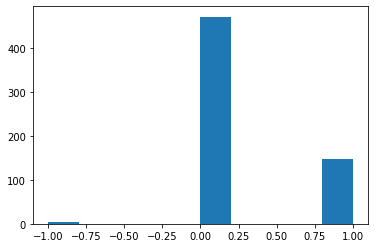

In [ ]:
for i in range(len(out)):
  if(out[i]>=0.5):
    out[i] = 1
  else:
    out[i] = 0
err = out - Y_test
a = plt.hist(err)

Accuracy: 
0.7564102564102564


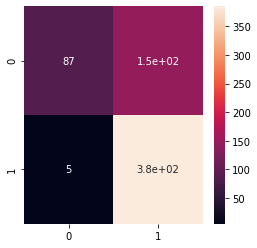

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, out)
plt.matshow(confusion_matrix(Y_test, out), cmap='binary')
import seaborn as sns    

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

print("Accuracy: ")
unique, counts = np.unique(err, return_counts=True)
print(counts[1]/len(err))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


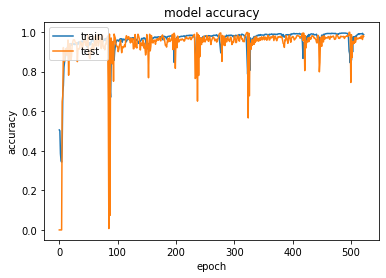

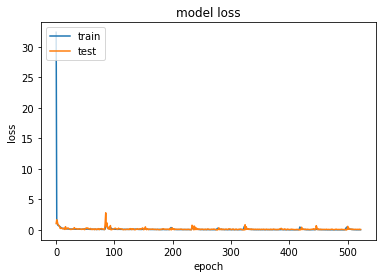

In [ ]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#for debugging
print("train normal: ", train_normal_images)
print("test normal: ",test_normal_images)
print("train pneumonia: ", train_pneumonia_images)
print("test pneumonia: ", test_pneumonia_images)

train normal:  ['N328.jpeg', 'N335.jpeg', 'N314.jpeg', 'N324.jpeg', 'N315.jpeg', 'N333.jpeg', 'N355.jpeg', 'N316.jpeg', 'N337.jpeg', 'N322.jpeg', 'N336.jpeg', 'N317.jpeg', 'N359.jpeg', 'N311.jpeg', 'N319.jpeg', 'N356.jpeg', 'N326.jpeg', 'N309.jpeg', 'N353.jpeg', 'N318.jpeg', 'N373.jpeg', 'N411.jpeg', 'N362.jpeg', 'N397.jpeg', 'N406.jpeg', 'N381.jpeg', 'N391.jpeg', 'N374.jpeg', 'N413.jpeg', 'N416.jpeg', 'N392.jpeg', 'N390.jpeg', 'N383.jpeg', 'N393.jpeg', 'N395.jpeg', 'N377.jpeg', 'N375.jpeg', 'N368.jpeg', 'N385.jpeg', 'N405.jpeg', 'N364.jpeg', 'N379.jpeg', 'N399.jpeg', 'N396.jpeg', 'N389.jpeg', 'N380.jpeg', 'N407.jpeg', 'N386.jpeg', 'N384.jpeg', 'N365.jpeg', 'N410.jpeg', 'N398.jpeg', 'N382.jpeg', 'N404.jpeg', 'N370.jpeg', 'N388.jpeg', 'N378.jpeg', 'N401.jpeg', 'N400.jpeg', 'N387.jpeg', 'N366.jpeg', 'N376.jpeg', 'N361.jpeg', 'N402.jpeg', 'N412.jpeg', 'N367.jpeg', 'N369.jpeg', 'N394.jpeg', 'N408.jpeg', 'N414.jpeg', 'N415.jpeg', 'N372.jpeg', 'N403.jpeg', 'N371.jpeg', 'N363.jpeg', 'N409.jpe